In [483]:
#import packages
import quandl
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file microsoft
apple  = pd.read_csv("EOD-AAPL.csv")
microsoft = pd.read_csv("EOD-MSFT.csv")
#print the head
microsoft.head()
apple.head()


,Date,Today,Tomorrow
0,1980-12-12,0.413192,0.391635
1,1980-12-15,0.391635,0.362891
2,1980-12-16,0.362891,0.371801
3,1980-12-17,0.371801,0.382724
4,1980-12-18,0.382724,0.406006


In [429]:
#setting index
microsoft.index = microsoft.Date
microsoft.drop('Date', axis=1, inplace=True)

In [433]:
microsoft.head()

,Date,Today,Tomorrow
0,1980-12-12,0.413192,0.391635
1,1980-12-15,0.391635,0.362891
2,1980-12-16,0.362891,0.371801
3,1980-12-17,0.371801,0.382724
4,1980-12-18,0.382724,0.406006


In [484]:
query = '2019-01-16'
microsoft[microsoft['Date'] == query]

,Date,Today,Tomorrow
8279,2019-01-16,105.38,106.12


In [485]:
query = '2017-01-03'
microsoft[microsoft['Date'] == query]

,Date,Today,Tomorrow
7767,2017-01-03,60.175508,59.906267


In [486]:
dataset_train = microsoft[7767:8279] 

In [487]:
dataset_train.head()

,Date,Today,Tomorrow
7767,2017-01-03,60.175508,59.906267
7768,2017-01-04,59.906267,59.906267
7769,2017-01-05,59.906267,60.425519
7770,2017-01-06,60.425519,60.233203
7771,2017-01-09,60.233203,60.213972


In [488]:
dataset_test = microsoft[8279:]

In [489]:
dataset_test.head()

,Date,Today,Tomorrow
8279,2019-01-16,105.38,106.12
8280,2019-01-17,106.12,107.71
8281,2019-01-18,107.71,105.68
8282,2019-01-22,105.68,106.71
8283,2019-01-23,106.71,106.20


In [490]:
training_set = dataset_train.iloc[:, 1:2].values

In [491]:
training_set

array([[ 60.17550843],
       [ 59.90626678],
       [ 59.90626678],
       [ 60.42551853],
       [ 60.23320307],
       [ 60.21397152],
       [ 60.76207059],
       [ 60.20435575],
       [ 60.2908977 ],
       [ 60.12742956],
       [ 60.09858224],
       [ 59.90626678],
       [ 60.3293608 ],
       [ 60.54090781],
       [ 61.0793911 ],
       [ 61.23324347],
       [ 61.80057409],
       [ 63.25255584],
       [ 62.62753058],
       [ 62.16597347],
       [ 61.13708574],
       [ 60.74283904],
       [ 61.23324347],
       [ 61.19478038],
       [ 60.99284914],
       [ 60.90630719],
       [ 61.59864285],
       [ 61.54094821],
       [ 62.23328388],
       [ 62.46406244],
       [ 62.42536703],
       [ 62.41569318],
       [ 62.5124317 ],
       [ 62.38667162],
       [ 62.26091155],
       [ 62.5124317 ],
       [ 62.5124317 ],
       [ 62.13515147],
       [ 61.89330517],
       [ 62.82199496],
       [ 61.92232673],
       [ 62.15449917],
       [ 62.17384688],
       [ 62

In [492]:

#Feature Scaling
training_set_scaled = scaler.fit_transform(training_set)

In [493]:
len(training_set_scaled)

512

In [494]:
X_train = []
y_train = []
for i in range(60, 512):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [448]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [449]:
# Initialising the RNN
LSTMmodel = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
LSTMmodel.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
LSTMmodel.add(Dropout(0.2))

In [450]:
# Adding a second LSTM layer and some Dropout regularisation
LSTMmodel.add(LSTM(units = 50, return_sequences = True))
LSTMmodel.add(Dropout(0.2))

In [452]:
# Adding a third LSTM layer and some Dropout regularisation
LSTMmodel.add(LSTM(units = 50, return_sequences = True))
LSTMmodel.add(Dropout(0.2))

In [453]:
# Adding a fourth LSTM layer and some Dropout regularisation
LSTMmodel.add(LSTM(units = 50))
LSTMmodel.add(Dropout(0.2))

In [454]:
# Adding the output layer
LSTMmodel.add(Dense(units = 1))

In [456]:
# Compiling the RNN
LSTMmodel.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
LSTMmodel.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
452/452 [==============================] - 27s 60ms/step - loss: 0.1106
Epoch 2/30
452/452 [==============================] - 14s 31ms/step - loss: 0.0301
Epoch 3/30
452/452 [==============================] - 14s 31ms/step - loss: 0.0175
Epoch 4/30
452/452 [==============================] - 14s 31ms/step - loss: 0.0149
Epoch 5/30
452/452 [==============================] - 13s 30ms/step - loss: 0.0125
Epoch 6/30
452/452 [==============================] - 14s 30ms/step - loss: 0.0112
Epoch 7/30
452/452 [==============================] - 14s 31ms/step - loss: 0.0115
Epoch 8/30
452/452 [==============================] - 14s 30ms/step - loss: 0.0096
Epoch 9/30
452/452 [==============================] - 14s 31ms/step - loss: 0.0094
Epoch 10/30
452/452 [==============================] - 14s 31ms/step - loss: 0.0090
Epoch 11/30
452/452 [==============================] - 14s 30ms/step - loss: 0.0078
Epoch 12/30
452/452 [==============================] - 14s 31ms/step - loss: 0.0072
E

In [457]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [480]:
dataset_total = pd.concat((dataset_train['Tomorrow'], dataset_test['Tomorrow']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 82):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = LSTMmodel.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [481]:
predicted_stock_price

array([[149.51021],
       [149.34093],
       [149.30727],
       [149.40407],
       [149.61548],
       [149.91747],
       [150.28838],
       [150.71068],
       [151.16635],
       [151.65675],
       [152.20091],
       [152.82501],
       [153.5626 ],
       [154.44943],
       [155.5133 ],
       [156.75854],
       [158.16478],
       [159.68872],
       [161.27582],
       [162.86626],
       [164.40405],
       [165.84048]], dtype=float32)

In [504]:
real_stock_price

array([[105.38],
       [106.12],
       [107.71],
       [105.68],
       [106.71],
       [106.2 ],
       [107.17],
       [105.08],
       [102.94],
       [106.38],
       [104.43],
       [102.78],
       [105.74],
       [107.22],
       [106.03],
       [105.27],
       [105.67],
       [105.25],
       [106.89],
       [106.81],
       [106.9 ],
       [108.22]])

In [474]:
rms=np.sqrt(np.mean(np.power((real_stock_price-predicted_stock_price),2)))
rms

10.299247943999259

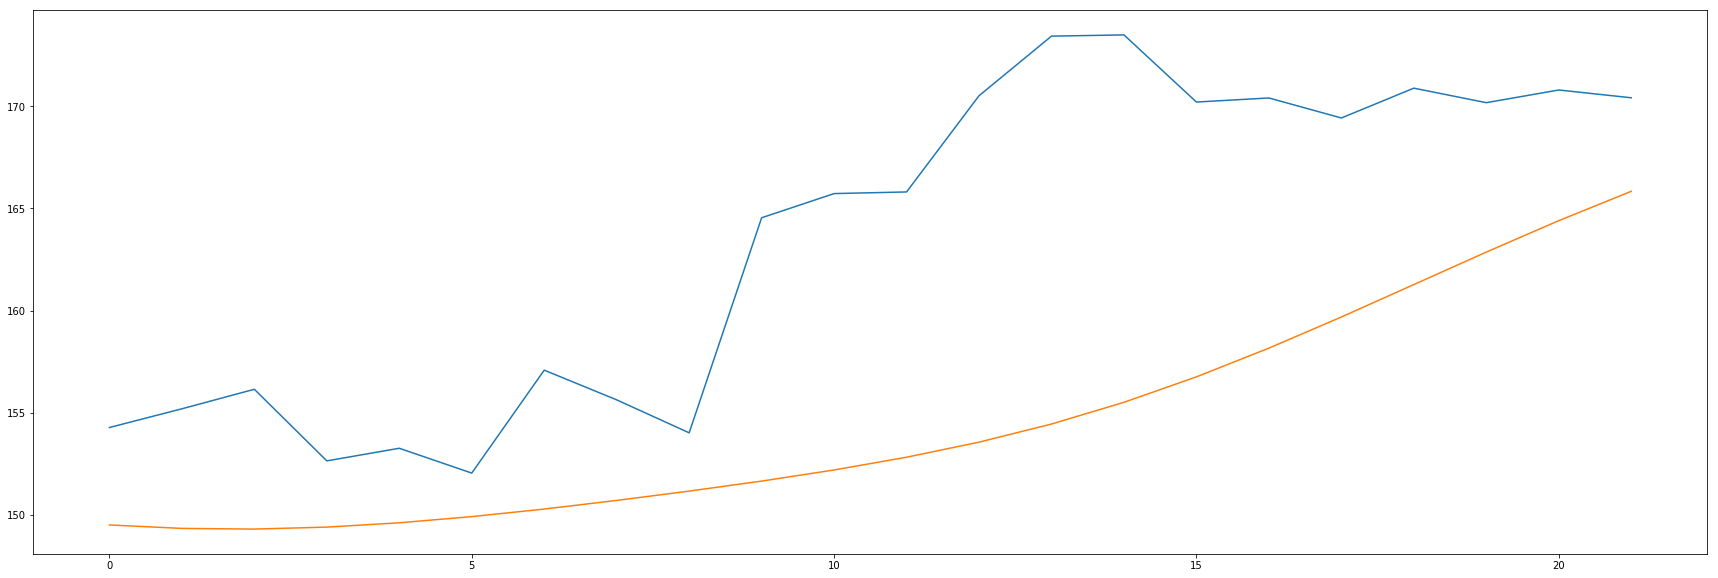

In [475]:
# Visualising the results
plt.plot(real_stock_price,label = 'Real Stock Price')
plt.plot(predicted_stock_price,label = 'Predicted Stock Price')

In [496]:
# Initialising the RNN
LSTMmodel2 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
LSTMmodel2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
LSTMmodel2.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
LSTMmodel2.add(LSTM(units = 50, return_sequences = True))
LSTMmodel2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
LSTMmodel2.add(LSTM(units = 50, return_sequences = True))
LSTMmodel2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
LSTMmodel2.add(LSTM(units = 50))
LSTMmodel2.add(Dropout(0.2))

# Adding the output layer
LSTMmodel2.add(Dense(units = 1))

# Compiling the RNN
LSTMmodel2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
LSTMmodel2.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
452/452 [==============================] - 25s 55ms/step - loss: 0.0996
Epoch 2/30
452/452 [==============================] - 12s 27ms/step - loss: 0.0183
Epoch 3/30
452/452 [==============================] - 11s 25ms/step - loss: 0.0090
Epoch 4/30
452/452 [==============================] - 11s 24ms/step - loss: 0.0060
Epoch 5/30
452/452 [==============================] - 11s 25ms/step - loss: 0.0081
Epoch 6/30
452/452 [==============================] - 12s 27ms/step - loss: 0.0069
Epoch 7/30
452/452 [==============================] - 11s 24ms/step - loss: 0.0068
Epoch 8/30
452/452 [==============================] - 11s 24ms/step - loss: 0.0057
Epoch 9/30
452/452 [==============================] - 11s 24ms/step - loss: 0.0074
Epoch 10/30
452/452 [==============================] - 11s 25ms/step - loss: 0.0049
Epoch 11/30
452/452 [==============================] - 11s 24ms/step - loss: 0.0056
Epoch 12/30
452/452 [==============================] - 11s 25ms/step - loss: 0.0061
E

In [497]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [501]:
dataset_total = pd.concat((dataset_train['Tomorrow'], dataset_test['Tomorrow']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 82):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = LSTMmodel2.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [502]:
rms=np.sqrt(np.mean(np.power((real_stock_price-predicted_stock_price),2)))
rms

2.0666148731649185

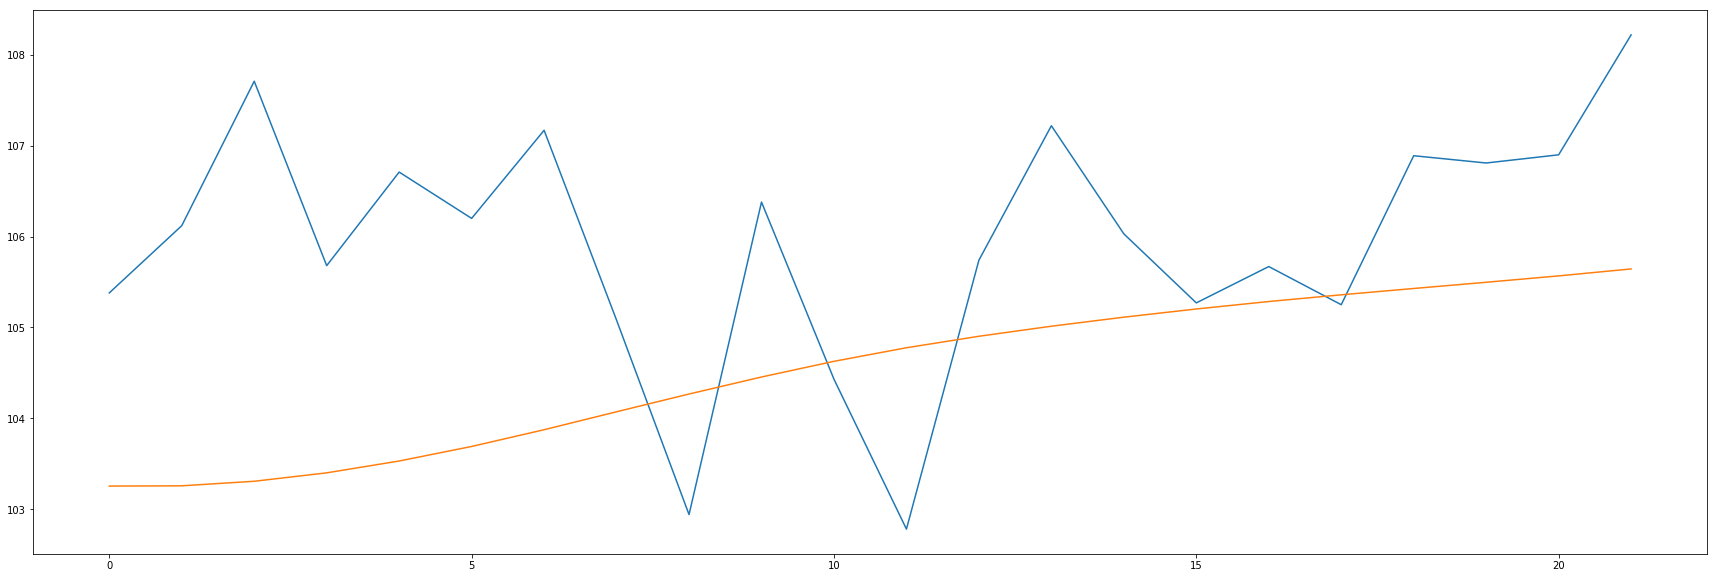

In [503]:
# Visualising the results
plt.plot(real_stock_price,label = 'Real Stock Price')
plt.plot(predicted_stock_price,label = 'Predicted Stock Price')